In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

mpl.rcParams['font.family'] = 'MalgunGothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

In [2]:
df = (
    pd.read_csv("./results/2nd-dataset_서울 송파구_20250602_110023.csv")    
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               731 non-null    object 
 1   region_code        731 non-null    object 
 2   accident_count     731 non-null    int64  
 3   game_count         731 non-null    int64  
 4   sports_types       731 non-null    object 
 5   is_post_season     731 non-null    int64  
 6   temperature        731 non-null    float64
 7   precipitation      731 non-null    float64
 8   snow_depth         731 non-null    float64
 9   weather_condition  731 non-null    object 
 10  is_holiday         731 non-null    int64  
 11  weekday            731 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 68.7+ KB


In [3]:
# 수치/범주 변수 분리
num_cols  = ["game_count","temperature","precipitation","snow_depth"]
cat_cols  = ["sports_types","is_post_season","is_holiday","weekday"]


c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\stagv\anaconda3\envs\testenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) Ari

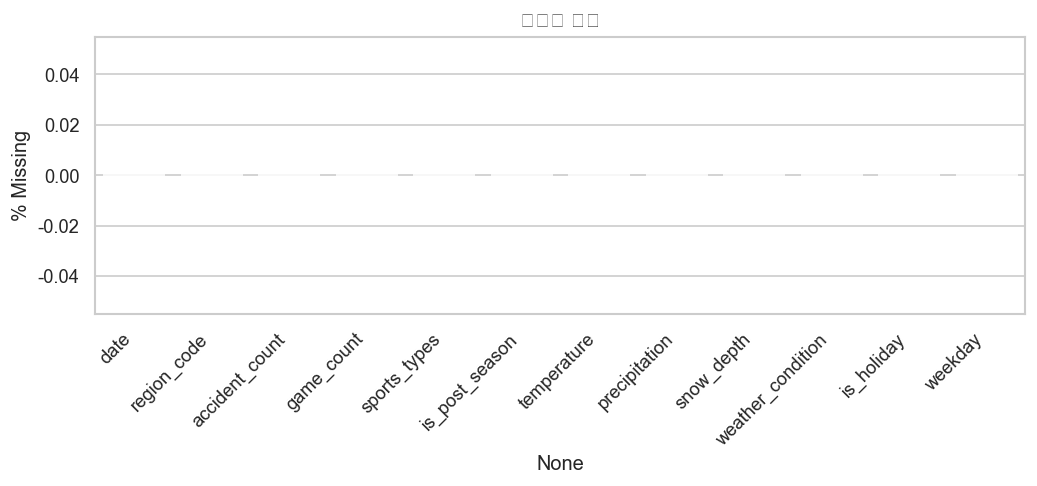

In [4]:
# -------------------- 3-1. 품질·결측치 시각화 ---------------
na_pct = df.isna().mean().mul(100).sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=na_pct.index, y=na_pct.values)
plt.xticks(rotation=45, ha="right"); plt.ylabel("% Missing")
plt.title("결측치 비율"); plt.show()

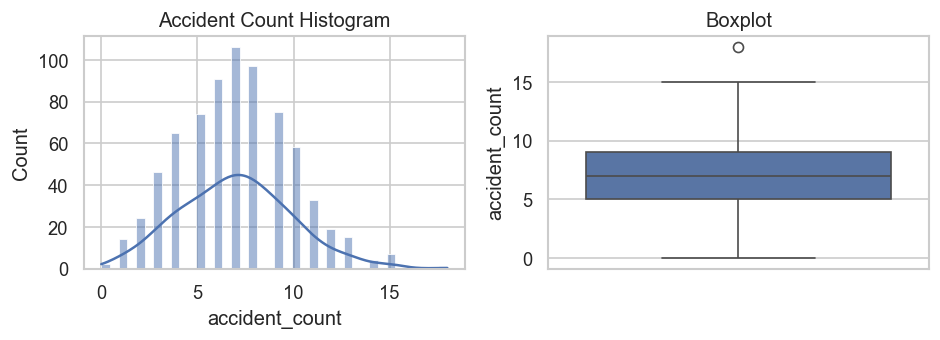

In [5]:
# -------------------- 3-2. 사고건수 기본 분포 ----------------
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.histplot(df["accident_count"], bins=40, kde=True, ax=ax[0])
ax[0].set_title("Accident Count Histogram")
sns.boxplot(y=df["accident_count"], ax=ax[1])
ax[1].set_title("Boxplot")
plt.tight_layout(); plt.show()

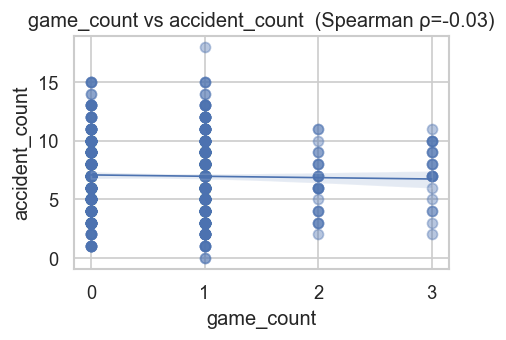

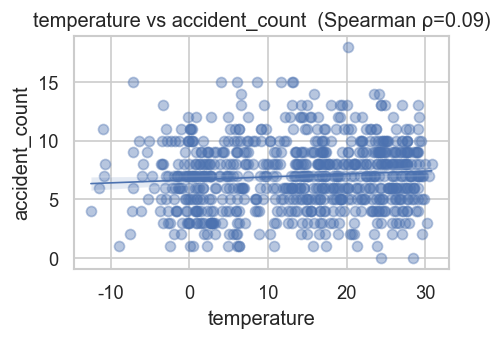

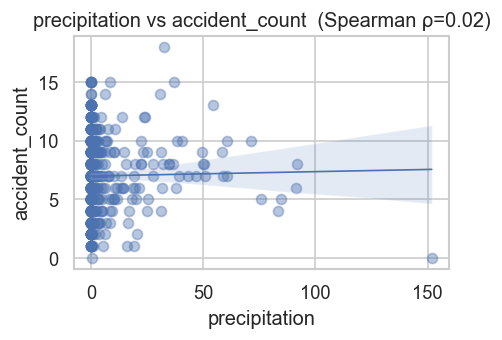

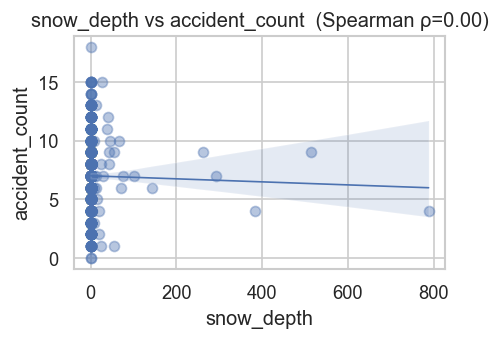

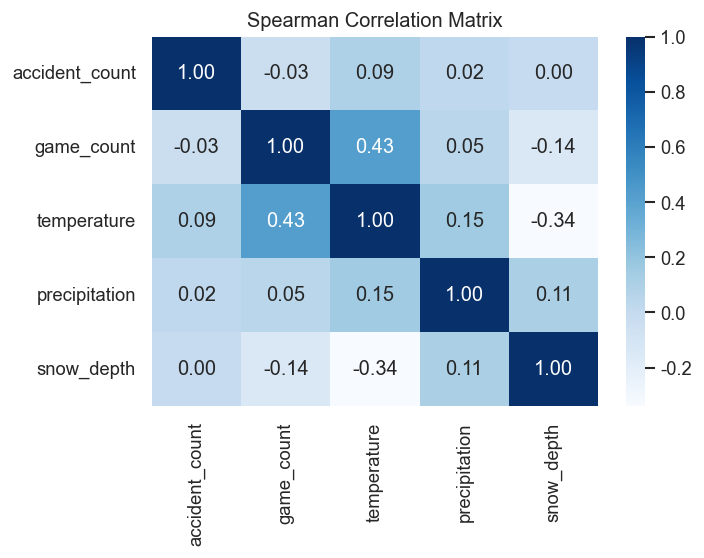

In [6]:
# -------------------- 3-3. 수치형 ↔ 사고건수 관계 ------------
# (a) 산점도 + 선형회귀선
for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.regplot(x=col, y="accident_count", data=df,
                scatter_kws={'alpha':0.4}, line_kws={'lw':1})
    r, p = spearmanr(df[col], df["accident_count"], nan_policy='omit')
    plt.title(f"{col} vs accident_count  (Spearman ρ={r:.2f})")
    plt.tight_layout(); plt.show()

# (b) 상관계수 히트맵
corr = df[["accident_count"] + num_cols].corr(method="spearman")
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Spearman Correlation Matrix"); plt.show()

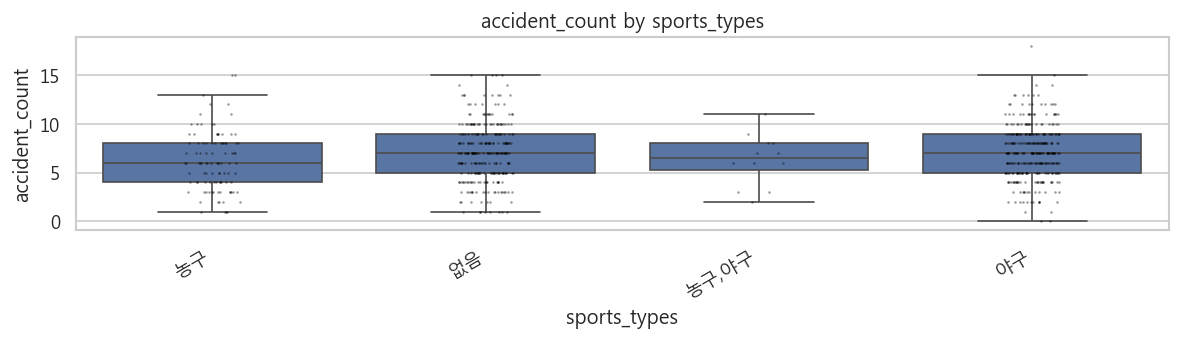

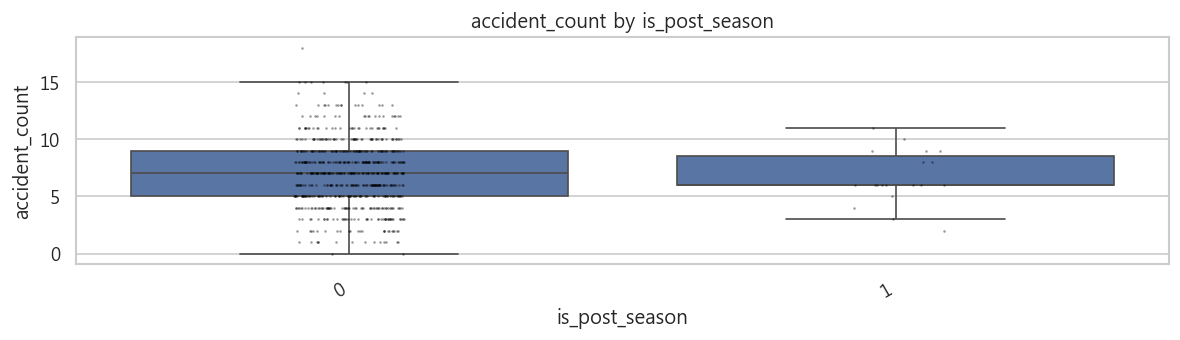

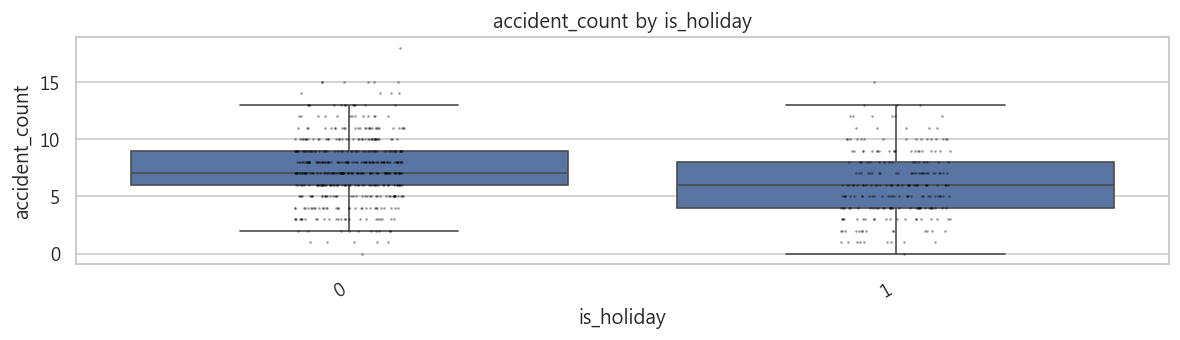

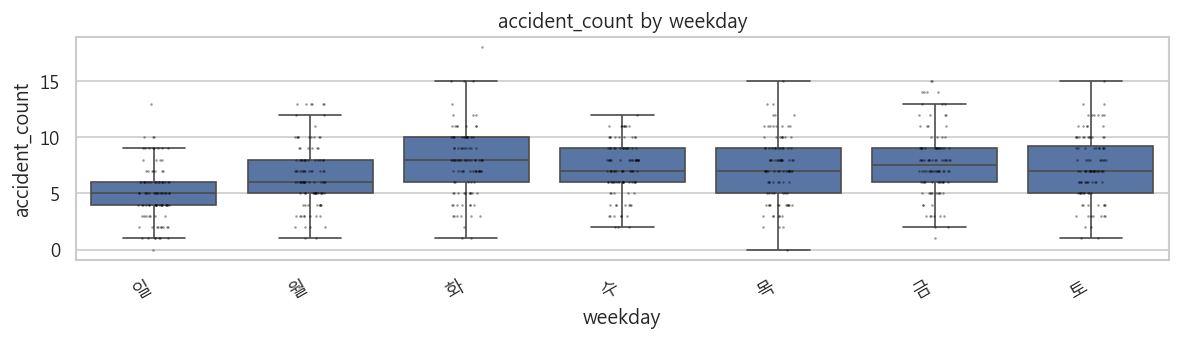

In [7]:
# -------------------- 3-4. 범주형 ↔ 사고건수 -----------------
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
for col in cat_cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=col, y="accident_count", data=df,
                showfliers=False)
    sns.stripplot(x=col, y="accident_count", data=df,
                  color='black', size=1.5, alpha=0.4)
    plt.title(f"accident_count by {col}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout(); plt.show()

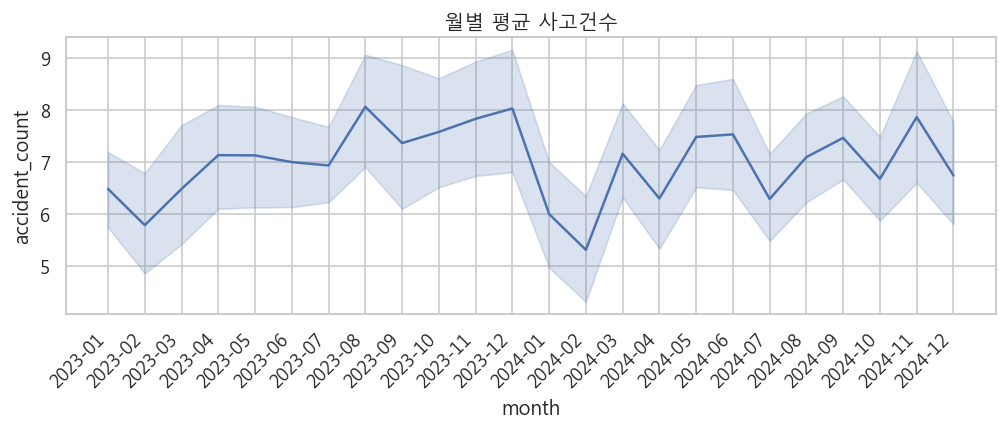

In [8]:

# -------------------- 3-5. 시계열 & 시간대 ------------------
# (a) 월별 평균
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")
plt.figure(figsize=(10,3))
sns.lineplot(x=df["month"].astype(str), y="accident_count",
             estimator="mean", errorbar="ci", data=df)
plt.xticks(rotation=45, ha="right"); plt.title("월별 평균 사고건수"); plt.show()

# (b) 시작 시간대별 분포
#plt.figure(figsize=(7,3))
#sns.boxplot(x="start_hour", y="accident_count", data=df,
#            palette="vlag", showfliers=False)
#plt.title("경기 시작 시각대 vs 사고건수"); plt.show()

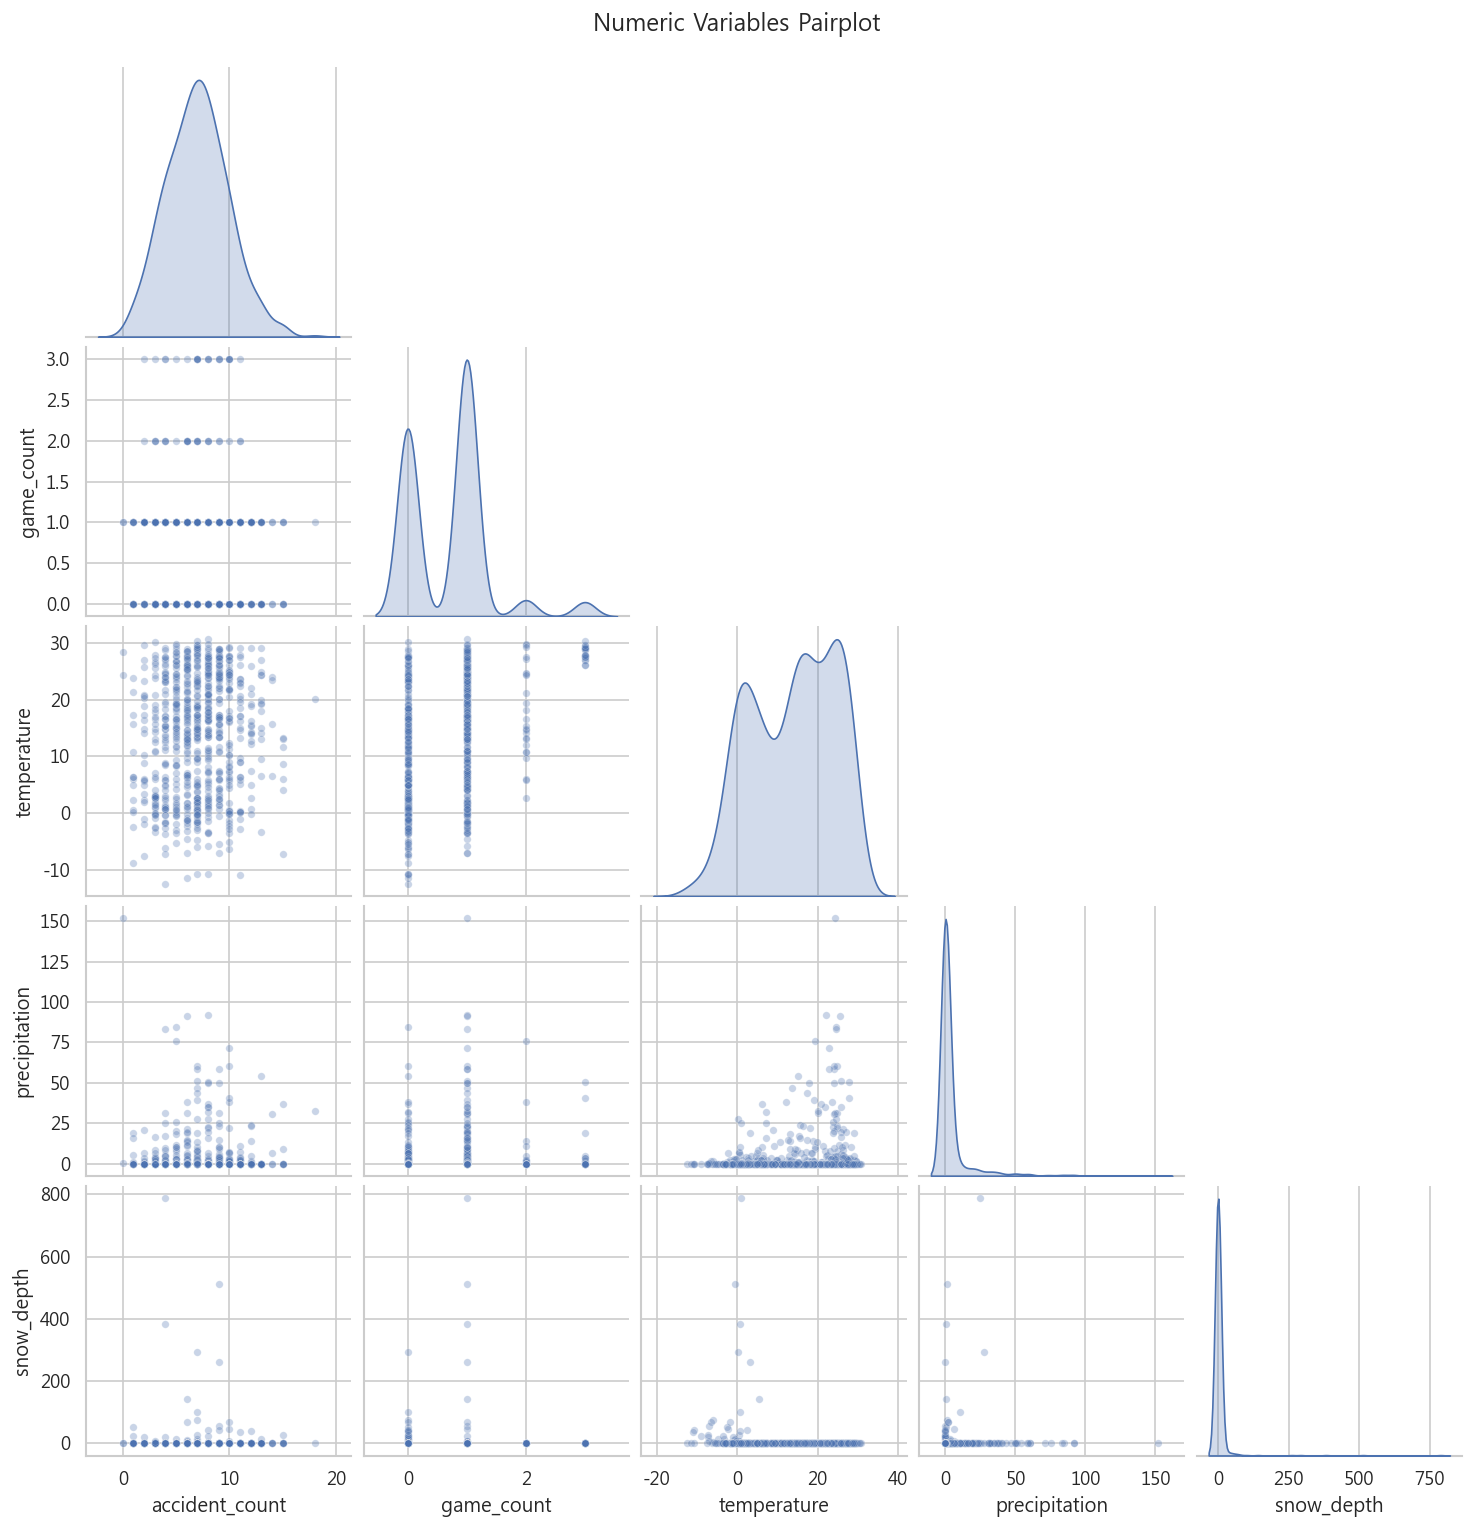

In [9]:
# -------------------- 3-6. 다중 상관 Pairplot ----------------
sns.pairplot(df[["accident_count"] + num_cols], diag_kind="kde",
             corner=True, plot_kws={'alpha':0.3, 's':20})
plt.suptitle("Numeric Variables Pairplot", y=1.02); plt.show()

In [ ]:
# 포아송 분포를 이용한 

from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf

game_day = df[df['sports_types'].str.contains("야구")]
no_game_day = df[df['sports_types'].str.contains("없음")]

# 경기당 평균·신뢰구간(부트스트랩) ───────────────
def bootstrap_mean(series, n_boot=5000):
    boot = np.random.choice(series, (n_boot, len(series)), replace=True).mean(axis=1)
    return boot.mean(), np.percentile(boot, [2.5, 97.5])

ngd_mu, ngd_ci = bootstrap_mean(no_game_day["accident_count"])
gd_mu, gd_ci = bootstrap_mean(game_day["accident_count"])

print(f"NO GAME DAY μ={ngd_mu:.2f} ({ngd_ci[0]:.2f}–{ngd_ci[1]:.2f})")
print(f"GAME DAY μ={gd_mu:.2f} ({gd_ci[0]:.2f}–{gd_ci[1]:.2f})")

# 비모수 검정 ──────────────────────────────────
u, p = mannwhitneyu(game_day["accident_count"], no_game_day["accident_count"], alternative='two-sided')
print(f"Mann-Whitney U p-value = {p:.4f}")

# Poisson 회귀(경기수 차 고려) ────────────────
# 사고 건수를 종속변수, 야구 경기가 있는 날로 한정
contains_baseball = df['sports_types'].str.contains("야구")
df['is_baseball_day'] = contains_baseball.astype(int)

model = smf.glm("accident_count ~ is_baseball_day", data=df,
                family=sm.families.Poisson()).fit()
print(model.summary())
rr = np.exp(model.params["is_baseball_day"])
ci_low, ci_high = np.exp(model.conf_int().loc["is_baseball_day"])
print(f"Incidence-Rate-Ratio (IRR) = {rr:.2f} ({ci_low:.2f}–{ci_high:.2f})")

NO GAME DAY μ=7.13 (6.79–7.48)
GAME DAY μ=7.13 (6.84–7.42)
Mann-Whitney U p-value = 0.9675
                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_count   No. Observations:                  731
Model:                            GLM   Df Residuals:                      729
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.0
Date:                    월, 02 6 2025   Deviance:                       934.81
Time:                        15:18:25   Pearson chi2:                     877.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002115
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------